<h1>Evaluating Neighborhood in Manhattan</h1>
<hr>

In this project, We look at different Neighborhood in the Manhattan area in terms of land use. For this, Information related to different borough of New York and the venue in Manhattan area are used. The information is in two formats, CSv and Json.

<h3>1- Environment preparation</h3>
<h4>1-1- Importing required libraries.</h4>

In [172]:
import pandas as pd
import numpy as np
import json
import folium
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import k-means from clustering stage
from sklearn.cluster import KMeans

<h4>1-2- Reading files from database and assign to Python variables</h4>

In [47]:
MAIN_PATH = 'E:\\dev\\Data Analysis\\DataBase\\'
MANHATTAN_VENUES = 'manhattan_venues.csv'
GEO_JSON_NEW_YORK = 'nyu-geojson.json'

In [54]:
with open('{}{}'.format(MAIN_PATH,GEO_JSON_NEW_YORK)) as json_data:
    json_new_york = json.load(json_data)

In [228]:
df_manhattan_venus = pd.read_csv('{}{}'.format(MAIN_PATH, MANHATTAN_VENUES))

In [229]:
df_manhattan_venus.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

<h3>2- Data preparation</h3>
<h4>2-1- Finding The geograpical coordinate of Manhattan.</h4>

In [230]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


<h4>2-2- Creating map of Manhattan using latitude and longitude values and add locations of the neighborhood along with the venues. </h4> <p>Location of the neighborhood and venues are Displayed in red and blue </p>

In [231]:
# 
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)
df_manhattan_venus.columns
# add markers to map
i = 0
for lat, lng in zip(df_manhattan_venus['Venue Latitude'], df_manhattan_venus['Venue Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)

df_neighborhood = zip(df_manhattan_venus['Neighborhood Latitude'].unique(),df_manhattan_venus['Neighborhood Longitude'].unique())
df_neighborhood = list(set(df_neighborhood))
for lat, lng in df_neighborhood:
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill=True,
        fill_color='#ff0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)

map_manhattan

<h4>2-3- Add a column named "Category"</h4>
<p>In this column, we create our classification using the classification in the Jason file. In this form of classification, we put all the items that are related to a type of land use in one category. For example, "shop" and "store" land use are put into the category of "Shop & Store"</p>
<p>In order to classify land uses, 11 categories have been considered. These classifications are:</p><br>
1- Neighborhood Latitude<br>
2- Neighborhood Longitude<br>
4- Arts <br>
5- Bar<br>
6- Cafe<br>
7- Entertainment<br>
8- Health & Beauty<br>
9- Office<br>
10- Restaurant & Food<br>
11- School <br>
12- Shop & Store<br>
13- Sport<br>
14- Transit<br>

In [232]:
df_manhattan_venus['Category'] = 'None'
df_manhattan_venus.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category Category  
0       40.874412       -73.910271    Pizza Place     None  
1       40.876844       -73.906204    Yoga Studio     None  
2       40.880404       -73.908937          Diner     None  
3       40.877531       -73.905582    Coffee Shop     None  
4       40.877136       -73.906666     Donut Shop     None

In [233]:
df_categories = df_manhattan_venus['Venue Category'].unique()

In [234]:
condition_shop=df_manhattan_venus['Venue Category'].str.contains(r'Shop', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Store', na=True) | \
               df_manhattan_venus['Venue Category'].str.contains(r'Market', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Bookstore', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Plaza', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Bakery', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Mall', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Deli / Bodega', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Supermarket', na=True)

df_manhattan_venus.loc[condition_shop,'Category'] = 'Shop & Store'
#df_manhattan_venus[condition_shop].head()

In [235]:
condition_restaurant=df_manhattan_venus['Venue Category'].str.contains(r'Restaurant', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Food', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Sandwich', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Taco', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Dinner', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Salad', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Gastropub', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Burger', na=True) | \
                     df_manhattan_venus['Venue Category'].str.contains(r'Noodle', na=True)
df_manhattan_venus.loc[condition_restaurant,'Category'] = 'Restaurant & Food'
#df_manhattan_venus[condition_restaurant].head()

In [236]:
condition_cafe=df_manhattan_venus['Venue Category'].str.contains(r'Cafe', na=True) | \
               df_manhattan_venus['Venue Category'].str.contains(r'Tea', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Café', na=True)
df_manhattan_venus.loc[condition_cafe,'Category'] = 'Cafe'
#df_manhattan_venus[condition_cafe].head()

In [237]:
condition_sport=df_manhattan_venus['Venue Category'].str.contains(r'Court', na=True) | \
                df_manhattan_venus['Venue Category'].str.contains(r'Gym', na=True) | \
                df_manhattan_venus['Venue Category'].str.contains(r'Pool', na=True) | \
                df_manhattan_venus['Venue Category'].str.contains(r'Sport', na=True) & \
                ~df_manhattan_venus['Venue Category'].str.contains(r'Food', na=True)
df_manhattan_venus.loc[condition_sport,'Category'] = 'Sport'
#df_manhattan_venus[condition_sport].head()

In [238]:
condition_entertainment=df_manhattan_venus['Venue Category'].str.contains(r'Park', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Garden', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Lounge', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Spa', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Yoga', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Memorial Site', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Pilates Studio', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Massage Studio', na=True)| \
               df_manhattan_venus['Venue Category'].str.contains(r'Dog Run', na=True)
df_manhattan_venus.loc[condition_entertainment,'Category'] = 'Entertainment'
#df_manhattan_venus[condition_park].head()

In [239]:
condition_art=df_manhattan_venus['Venue Category'].str.contains(r'Theater', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Art', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Concert', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Comedy', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Museum', na=True)
df_manhattan_venus.loc[condition_art,'Category'] = 'Arts'
#df_manhattan_venus[condition_theater].head()

In [240]:
condition_school=df_manhattan_venus['Venue Category'].str.contains(r'School', na=True)
df_manhattan_venus.loc[condition_school,'Category'] = 'School'
#df_manhattan_venus[condition_school].head()

In [241]:
condition_transit=df_manhattan_venus['Venue Category'].str.contains(r'Bus', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Line', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Stop', na=True) | \
                  df_manhattan_venus['Venue Category'].str.contains(r'Train', na=True)
df_manhattan_venus.loc[condition_transit,'Category'] = 'Transit'
#df_manhattan_venus[condition_transit].head()

In [242]:
condition_health_beauty=df_manhattan_venus['Venue Category'].str.contains(r'Health & Beauty', na=True)| \
                        df_manhattan_venus['Venue Category'].str.contains(r'Salon / Barbershop', na=True) | \
                        df_manhattan_venus['Venue Category'].str.contains(r'Pharmacy', na=True) | \
                        df_manhattan_venus['Venue Category'].str.contains(r'Boutique', na=True)
df_manhattan_venus.loc[condition_health_beauty,'Category'] = 'Health & Beauty'
#df_manhattan_venus[condition_health_beauty].head()

In [243]:
condition_office=df_manhattan_venus['Venue Category'].str.contains(r'Office', na=True)| \
                 df_manhattan_venus['Venue Category'].str.contains(r'Bank', na=True)
df_manhattan_venus.loc[condition_office,'Category'] = 'Office'
#df_manhattan_venus[condition_office]

In [244]:
condition_bar=df_manhattan_venus['Venue Category'].str.contains(r'Bar', na=True) | \
              df_manhattan_venus['Venue Category'].str.contains(r'Nightclub', na=True)| \
              df_manhattan_venus['Venue Category'].str.contains(r'Bistro', na=True)| \
              df_manhattan_venus['Venue Category'].str.contains(r'Pub', na=True)| \
              df_manhattan_venus['Venue Category'].str.contains(r'Speakeasy', na=True)| \
              df_manhattan_venus['Venue Category'].str.contains(r'Beer', na=True)
df_manhattan_venus.loc[condition_bar,'Category'] = 'Bar'
#df_manhattan_venus[condition_bar]

<h4>2-4- Classification results</h4>
<p>After performing the classification, the number of classifications that do not fit in our category will be determined. The reason for the existence of unclassified cases is not to go into the details of land use, and the study of land use is essential.</p>
<p>Number of venue category that categorized: 2777</p>
<p>Number of uncategorized: 409</p>

In [245]:
condition_none = df_manhattan_venus['Category']=='None'
print('Number of venue category that categorized: {}'.format(len(df_manhattan_venus[~condition_none])))
print('Number of uncategorized: {}'.format(len(df_manhattan_venus[condition_none])))

Number of venue category that categorized: 2777
Number of uncategorized: 409


In [246]:
df_manhattan_categorize_venue = df_manhattan_venus.iloc[:,[0,1,2,4,5,7]]
condition_none = df_manhattan_categorize_venue['Category']=='None'
df_manhattan_categorize_venue = df_manhattan_categorize_venue[~condition_none].reset_index(drop=True)
df_manhattan_categorize_venue.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue Latitude  \
0  Marble Hill              40.876551               -73.91066       40.876844   
1  Marble Hill              40.876551               -73.91066       40.877531   
2  Marble Hill              40.876551               -73.91066       40.877136   
3  Marble Hill              40.876551               -73.91066       40.876705   
4  Marble Hill              40.876551               -73.91066       40.875467   

   Venue Longitude         Category  
0       -73.906204    Entertainment  
1       -73.905582     Shop & Store  
2       -73.906666     Shop & Store  
3       -73.906372            Sport  
4       -73.908906  Health & Beauty

In [247]:
df_manhattan_dummies_category = pd.get_dummies(df_manhattan_categorize_venue[['Category']],prefix="", prefix_sep="")
df_manhattan_dummies_category['Neighborhood'] = df_manhattan_categorize_venue['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [df_manhattan_dummies_category.columns[-1]] + list(df_manhattan_dummies_category.columns[:-1])
df_manhattan_dummies_category = df_manhattan_dummies_category[fixed_columns]
df_manhattan_dummies_category.head()


Neighborhood  Arts  Bar  Cafe  Entertainment  Health & Beauty  Office  \
0  Marble Hill     0    0     0              1                0       0   
1  Marble Hill     0    0     0              0                0       0   
2  Marble Hill     0    0     0              0                0       0   
3  Marble Hill     0    0     0              0                0       0   
4  Marble Hill     0    0     0              0                1       0   

   Restaurant & Food  School  Shop & Store  Sport  Transit  
0                  0       0             0      0        0  
1                  0       0             1      0        0  
2                  0       0             1      0        0  
3                  0       0             0      1        0  
4                  0       0             0      0        0

<h4>2-5- Calculating the number of land uses in each Neighborhood</h4>
<p>By summing the number of land uses in each neighbourhood, the total number of land use is determined according to the type and neighbourhood location.</p>

In [248]:
df_manhattan_dummies_category = df_manhattan_dummies_category.groupby('Neighborhood').sum()
df_manhattan_dummies_category.head()

Arts  Bar  Cafe  Entertainment  Health & Beauty  Office  \
Neighborhood                                                                 
Battery Park City     2    4     0             12                0       0   
Carnegie Hill         2    8     5              5                0       1   
Central Harlem        1    6     2              3                1       0   
Chelsea               9    9     2              1                2       1   
Chinatown             2   11     4              5                3       1   

                   Restaurant & Food  School  Shop & Store  Sport  Transit  
Neighborhood                                                                
Battery Park City                  7       1            21      7        0  
Carnegie Hill                     23       1            30      6        0  
Central Harlem                    17       0             6      2        0  
Chelsea                           27       0            34      2        0  
Chinatown                         40       0            25      0        0

<h3>3- Analyze  Data</h3>
<p>In this section, we evaluate the results using the information obtained from the previous sections.</p>
<h4>3-1- Distributing of each land use in Neighborhoods</h4>
<p>In order to investigate this, a box plot chart is drawn. As can be seen in the diagram below, the land use of "food and restaurant" and "shopping and store" in the distribution network is higher. Still, the amount of this distribution varies from region to region. This is well illustrated in the diagram.</p>
<p>Other land uses that are found in these areas and have a high distribution.</p>

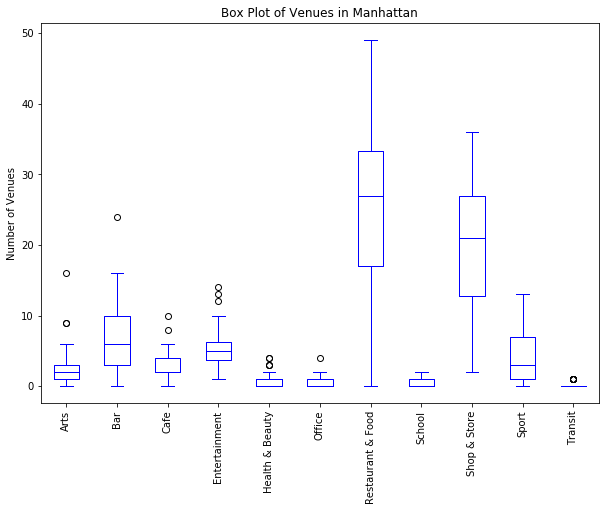

In [249]:
df_manhattan_dummies_category.plot(kind='box', figsize=(10, 7), color='blue', vert=True, rot=90)
plt.title('Box Plot of Venues in Manhattan')
plt.ylabel('Number of Venues')
plt.show()

<h4>3-2- Show Manhattan Venues for each Neighborhood</h4>
<p>To show the distribution of venues in a different neighbourhood, the map of Manhattan has been used, and in it, each of the venues is shown on the map with its specific land use colour.</p>

In [272]:
map_manhattan_venue = folium.Map(location=[latitude, longitude], zoom_start=11)
condition_none = df_manhattan_venus['Category']=='None'
condition =  df_manhattan_venus['Category']=='Entertainment'
df_manhattan_venus_cond_ = df_manhattan_venus[~condition_none]

colors = {'Restaurant & Food':'#ff1744',
          'Shop & Store':'#0d47a1','Cafe':'#651fff','Sport':'#3d5afe','None':'#000000',
          'Entertainment':'#00e676','Arts':'#1de9b6','School':'#ffea00','Transit':'#ffc400','Health & Beauty':'#009688','Office':'#8bc34a','Bar':'#cddc39'}
i = 0
for lat, lng, category, neighborhood in zip(df_manhattan_venus_cond_['Venue Latitude'], df_manhattan_venus_cond_['Venue Longitude'], df_manhattan_venus_cond_['Category'], df_manhattan_venus_cond_['Neighborhood']):
    label = '{}, {}'.format(category, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[category],
        fill=True,
        fill_color=colors[category],
        fill_opacity=1,
        parse_html=False).add_to(map_manhattan_venue)

map_manhattan_venue

<h4>3-3- Clustering different Neighborhood based on the proximity of their land use to each other</h4>
<p>In order to select the best neighbourhood that has the most access to different land uses, we use clustering. In this method, considering 5 clusters for the neighbourhoods in the Methane area, we perform the clustering operation.</p>

In [79]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_manhattan_dummies_category)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 4, 2, 4, 3, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 2, 0, 4, 0, 2, 2, 2,
       1, 4, 0, 2, 3, 3, 1, 4, 1, 0, 2, 0, 3, 0, 3, 4, 3, 0])

In [169]:
df_borough_manhattan = df_manhattan_venus.groupby('Neighborhood').mean()
df_borough_manhattan.drop(['Venue Latitude','Venue Longitude'], axis=1, inplace=True)
df_borough_manhattan['Cluster'] = kmeans.labels_
df_borough_manhattan.head()

Neighborhood Latitude  Neighborhood Longitude  Cluster
Neighborhood                                                             
Battery Park City              40.711932              -74.016869        2
Carnegie Hill                  40.782683              -73.953256        4
Central Harlem                 40.815976              -73.943211        2
Chelsea                        40.744035              -74.003116        4
Chinatown                      40.715618              -73.994279        3

In [170]:
map_manhattan_cluster = folium.Map(location=[latitude, longitude], zoom_start=11)

colors = {0:'#ff1744',1:'#000000',2:'#ffea00',3:'#3d5afe',4:'#009688'}
for lat, lng, cluster in zip(df_borough_manhattan['Neighborhood Latitude'], df_borough_manhattan['Neighborhood Longitude'], df_borough_manhattan['Cluster']):
    label = '{}'.format(cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=1,
        parse_html=False).add_to(map_manhattan_cluster)

map_manhattan_cluster

<p>The number of locations in each cluster is determined and then the results are evaluated.</p>

In [82]:
df_manhattan = pd.merge(df_borough_manhattan,df_manhattan_dummies_category,on='Neighborhood')

In [106]:
df_cluster_describe = df_manhattan.groupby('Cluster').sum()

In [ ]:
df_cluster_describe

<p>In the two bar graphs below, the amount of each land use is shown separately for each cluster. As can be seen in this figure, cluster number 1, which includes Neighborhoods 'Marble Hill', 'Roosevelt Island', 'Stuyvesant Town', has the least access to different uses.</p>
<p>Other clusters are better in terms of access than the neighbourhoods in the first cluster but differ in the amount of access to each of the uses.</p>

In [167]:
type_venue = df_cluster_describe.columns[[3,5,8,10,11]]

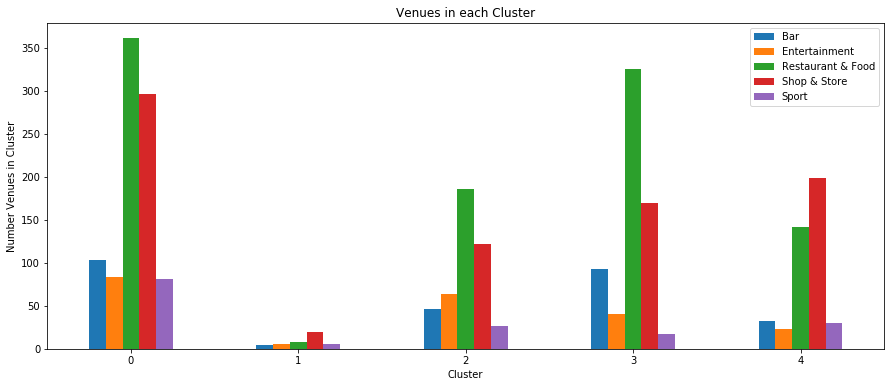

In [168]:
df_cluster_describe[type_venue].plot(kind='bar', figsize=(15, 6), rot=0)
plt.xlabel('Cluster')
plt.ylabel('Number Venues in Cluster')
plt.title('Venues in each Cluster')
plt.legend(labels=type_venue, loc='upper right')
plt.show()

In [165]:
type_venue = df_cluster_describe.columns[[2,4,6,7,9,12]]

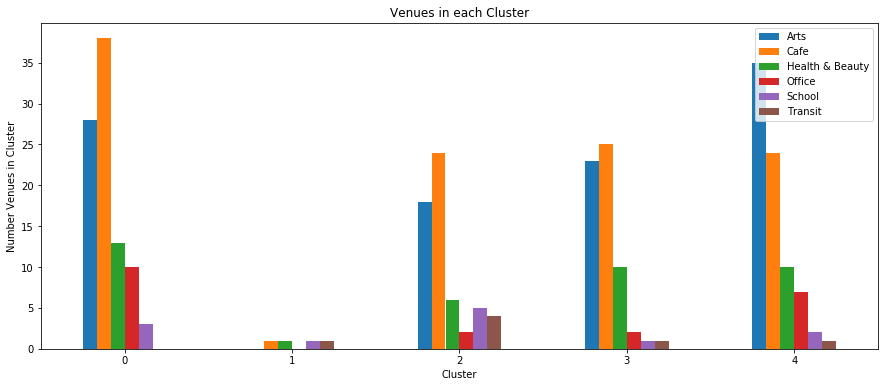

In [166]:
df_cluster_describe[type_venue].plot(kind='bar', figsize=(15, 6), rot=0)
plt.xlabel('Cluster')
plt.ylabel('Number Venues in Cluster')
plt.title('Venues in each Cluster')
plt.legend(labels=type_venue, loc='upper right')
plt.show()

<p>Neighborhoods in the cluster 0</p>

In [260]:
condition_cluster_1 = df_borough_manhattan['Cluster'] == 0
df_borough_manhattan.loc[condition_cluster_1].index.tolist()

['Civic Center',
 'Clinton',
 'Financial District',
 'Flatiron',
 'Gramercy',
 'Lenox Hill',
 'Little Italy',
 'Midtown South',
 'Sutton Place',
 'Tudor City',
 'Upper East Side',
 'Yorkville']

<p>Neighborhoods in the cluster 1</p>

In [261]:
condition_cluster_1 = df_borough_manhattan['Cluster'] == 1
df_borough_manhattan.loc[condition_cluster_1].index.tolist()

['Marble Hill', 'Roosevelt Island', 'Stuyvesant Town']

<p>Neighborhoods in the cluster 2</p>

In [262]:
condition_cluster_1 = df_borough_manhattan['Cluster'] == 2
df_borough_manhattan.loc[condition_cluster_1].index.tolist()

['Battery Park City',
 'Central Harlem',
 'East Harlem',
 'Hamilton Heights',
 'Hudson Yards',
 'Inwood',
 'Lower East Side',
 'Manhattan Valley',
 'Manhattanville',
 'Morningside Heights',
 'Tribeca']

<p>Neighborhoods in the cluster 3</p>

In [263]:
condition_cluster_1 = df_borough_manhattan['Cluster'] == 3
df_borough_manhattan.loc[condition_cluster_1].index.tolist()

['Chinatown',
 'East Village',
 'Greenwich Village',
 'Murray Hill',
 'Noho',
 'Turtle Bay',
 'Upper West Side',
 'West Village']

<p>Neighborhoods in the cluster 4</p>

In [264]:
condition_cluster_1 = df_borough_manhattan['Cluster'] == 4
df_borough_manhattan.loc[condition_cluster_1].index.tolist()

['Carnegie Hill',
 'Chelsea',
 'Lincoln Square',
 'Midtown',
 'Soho',
 'Washington Heights']